## At first we want to import all the modules which we want to in next 
as like ``import numpy as np, 
import pandas as pd, 
import seaborn as sb``

In [91]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### In next step we want to retrieve all data from data file like csv, exle, json etc 

In [4]:
zomato_data_set = pd.read_csv('../../asset/zomato/zomato.csv')

### Showing some data set what is it look like and understanding about data set 

In [6]:
zomato_data_set.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [7]:
zomato_data_set.tail(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


### For recommendations to user in this part we don't want to all data from here some unnecessary data we should drop from our data base 
like ``['url','dish_liked','phone']``

In [9]:
fresh_zomato_data = zomato_data_set.drop(['url','dish_liked','phone'], axis=1)

### now we get a fresh data set where have no unnecessary data and showings some data from new sata set

In [11]:
fresh_zomato_data.head(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


### now check the data set here have any duplicate or not 

In [13]:
total_of_duplicate =  fresh_zomato_data.duplicated().sum()
print(total_of_duplicate)

43


### now we want to remove duplicate 

In [15]:
fresh_zomato_data.drop_duplicates(inplace=True)

#### Why use ``inplace=True`` if inplace=False it return new df if is True is return on original df

#### Now we want to count how many null value have in our data base

In [18]:
fresh_zomato_data.isnull()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51713,False,False,False,False,True,False,False,False,False,False,False,False,False,False
51714,False,False,False,False,True,False,False,False,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### if you just write ``fresh_zomato_data.isnull()`` this it provides full table with True and False if you want to see the total null in every Cl ans Row by then you must ``.sum()`` this full True False value by formate 0 and 1 

In [20]:
fresh_zomato_data.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

#### Now you must remove NULL value or fill null field but in this case for number its ok but location and some important data which must provide by user in this case we must remove thos data row if any rows have NULL you must remove this 

In [22]:
fresh_zomato_data.dropna(how='any', inplace=True)

In [23]:
fresh_zomato_data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

##### Now here have no NULL row field 

### We already completed some step of data operation like
- Deleting Unnecessary Columns
- Removing the Duplicates
- Remove the NaN values from the dataset
#### Now we want to ``Changing the column names`` with flexibile and understandable col name like `` approx_cost(for two people) `` to `` cost ``

In [26]:
fresh_zomato_data = fresh_zomato_data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

In [27]:
fresh_zomato_data.tail(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
51716,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


#### Now we wnat to Some Transformations of database like Changing the cost to string Using lambda function to replace ',' from cost then we replace it again float number

In [29]:
fresh_zomato_data['cost'] = fresh_zomato_data['cost'].astype(str)
fresh_zomato_data['cost'] = fresh_zomato_data['cost'].apply(lambda x: x.replace(',','.'))
fresh_zomato_data['cost'] = fresh_zomato_data['cost'].astype(float)

to ',' to '.' we can not do this as int format that's why we convert it as str then change it and make it astype float

In [31]:
fresh_zomato_data.head(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


#### We just checking have any data fields in rate row is 'NEW' or '-' if have ignored it and reset the data set by new index and drop the previous on

In [33]:
fresh_zomato_data = fresh_zomato_data.loc[fresh_zomato_data.rate !='NEW']
fresh_zomato_data = fresh_zomato_data.loc[fresh_zomato_data.rate !='-'].reset_index(drop=True)

In [34]:
fresh_zomato_data.tail(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
41236,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental",1.5,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


after check we see likely 10k of data already drop and make a new df by new index

In [36]:
remove_slash = lambda x: x.replace('/5', '') if isinstance(x, str) else str(x)
fresh_zomato_data.rate = fresh_zomato_data.rate.apply(remove_slash).str.strip().astype('float')

In [37]:
fresh_zomato_data.tail(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
41236,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental",1.5,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


### Adjust the column names

adjust the name with capitalize and convert yes no to true false to better training to ML model

In [40]:
fresh_zomato_data.name = fresh_zomato_data.name.apply(lambda x:x.title())
fresh_zomato_data.online_order.replace(('Yes','No'),(True, False),inplace=True)
fresh_zomato_data.book_table.replace(('Yes','No'),(True, False),inplace=True)

## Computing Mean Rating

now just list of unic restaurants name and add a new col name minimum rating

In [43]:
restaurants = list(fresh_zomato_data['name'].unique())
fresh_zomato_data['Mean Rating'] = 0

In [44]:
fresh_zomato_data[['name', 'rate', 'Mean Rating']].tail(3)

,name,rate,Mean Rating
41234,Best Brews - Four Points By Sheraton Bengaluru...,3.6,0
41235,Chime - Sheraton Grand Bengaluru Whitefield Ho...,4.3,0
41236,The Nest - The Den Bengaluru,3.4,0


now we want to set a average mean rating of every restaurant like:

In [46]:
for i in range(len(restaurants)):
    fresh_zomato_data['Mean Rating'][fresh_zomato_data['name'] == restaurants[i]] = fresh_zomato_data['rate'][fresh_zomato_data['name'] == restaurants[i]].mean()

In [47]:
pai_vihar_data = fresh_zomato_data[fresh_zomato_data['name'] == 'Pai Vihar']
pai_vihar_data[['name', 'rate', 'Mean Rating']]

,name,rate,Mean Rating
4326,Pai Vihar,2.8,2.95
5281,Pai Vihar,3.2,2.95
9754,Pai Vihar,2.8,2.95
10476,Pai Vihar,3.2,2.95
11849,Pai Vihar,2.8,2.95
12421,Pai Vihar,2.8,2.95
30194,Pai Vihar,2.8,2.95
31155,Pai Vihar,3.3,2.95
31611,Pai Vihar,2.8,2.95
33988,Pai Vihar,2.8,2.95


#### This creates an instance of MinMaxScaler from sklearn.preprocessing, configured to scale values to a range of 1 to 5. MinMaxScaler transforms data to a specified range using the formula. Here, feature_range=(1, 5) sets the output range.

The raw Mean Rating values (4.15, 3.9) might not align with the original rate scale (typically 0–5 or 1–5 with /5 removed). Scaling ensures Mean Rating matches the 1–5 range, making it comparable to individual rate values and consistent with your earlier preprocessing (removing /5 from rate).

In [49]:
scaler = MinMaxScaler(feature_range = (1,5))
fresh_zomato_data[['Mean Rating']] = scaler.fit_transform(fresh_zomato_data[['Mean Rating']]).round(2)

#### Now the next step is to perform some text preprocessing steps which include:

##### Lower casing 

In [82]:
fresh_zomato_data["reviews_list"] = fresh_zomato_data["reviews_list"].str.lower()

##### Removal of Puctuations

string.punctuation is a constant from the string module in Python that contains all ASCII punctuation characters. It includes characters like !"#$%&'()*+,-./:;<=>?@[\]^_{|}~`. PUNCT_TO_REMOVE is assigned this string, creating a variable that holds the set of punctuation marks to be removed. text.translate(...) applies this translation table to the input text, removing all punctuation characters and returning the cleaned string.

In [93]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

fresh_zomato_data["reviews_list"] = fresh_zomato_data["reviews_list"].apply(lambda text: remove_punctuation(text))

##### Removal of Stopwords
custom function to remove the stopwords
This step further cleans the reviews_list column, building on your earlier preprocessing (converting to lowercase, removing punctuation). It prepares the text for NLP tasks like TF-IDF vectorization, which you use in your recommend('Pai Vihar') function.
Removing stopwords ensures that the similarity between reviews (computed via cosine similarity) is based on meaningful words, improving the quality of your recommendations.

nput text = "the food is very good and tasty"
STOPWORDS contains {'the', 'is', 'very', 'and', ...}
str(text).split() → ['the', 'food', 'is', 'very', 'good', 'and', 'tasty']
[word for word in ... if word not in STOPWORDS] → ['food', 'good', 'tasty'] (removes 'the', 'is', 'very', 'and')
" ".join(...) → 'food good tasty'
Output: 'food good tasty'

In [96]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

fresh_zomato_data["reviews_list"] = fresh_zomato_data["reviews_list"].apply(lambda text: remove_stopwords(text))

#### Removal of URLS

In [105]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

fresh_zomato_data["reviews_list"] = fresh_zomato_data["reviews_list"].apply(lambda text: remove_urls(text))

In [107]:
fresh_zomato_data[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
31632,rated 30 ratedn small spaced restaurant decent...,"North Indian, Chinese, Arabian, Rolls"
24586,rated 30 ratedn gone kopper kadhai team lunch ...,"North Indian, Chinese"
18451,rated 40 ratedn located near central mall ambi...,"Cafe, American, Continental, Italian"
2144,rated 50 ratedn ordered chilly chicken try res...,Chinese
27579,rated 40 ratedn colleague quick lunch prices w...,"Cafe, Continental, Burger, Salad, Healthy Food..."


In [109]:
restaurant_names = list(fresh_zomato_data['name'].unique())
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]
    
fresh_zomato_data=fresh_zomato_data.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

In [133]:
df_percent = fresh_zomato_data.sample(frac=0.5)
df_percent

,name,online_order,book_table,rate,location,cuisines,cost,reviews_list,city,Mean Rating
19111,Food Time Now,True,False,3.1,Rammurthy Nagar,"North Indian, Mughlai, Biryani",500.0,rated 10 ratedn delivered dead ants gulab jamu...,Kalyan Nagar,2.68
17887,Cross Road Cafe,True,False,3.9,Jayanagar,"Cafe, Fast Food, Chinese",300.0,rated 40 ratedn nice place spacious though sta...,JP Nagar,3.71
40547,Sweet Tooth - Do You Have One?,False,False,3.3,Whitefield,"Bakery, Desserts",600.0,,Whitefield,2.94
22927,Re:Cess - Hilton Bangalore Embassy Golflinks,False,True,4.1,Domlur,"South Indian, North Indian, Continental, European",1.2,rated 50 ratedn big thanks last night staff su...,Koramangala 4th Block,3.97
242,South Kitchen,True,False,4.3,Basavanagudi,South Indian,100.0,rated 50 ratedn idlychutney joint bangalore st...,Banashankari,4.23
...,...,...,...,...,...,...,...,...,...,...
30515,Pop'Z Kitchen,False,False,3.7,Lavelle Road,Bakery,250.0,rated 50 ratedn best brownies town order corpo...,Lavelle Road,3.45
37263,Cookie Man,True,False,3.7,Malleshwaram,Bakery,150.0,rated 20 ratedn please buy macaroons serve pat...,Rajajinagar,3.33
28068,Hunger Hitman,True,False,3.8,Koramangala,"North Indian, Chinese",300.0,rated 40 ratedn amazing food deliciously aweso...,Koramangala 7th Block,3.58
9586,Feast And Burp,False,False,3.3,Bannerghatta Road,North Indian,300.0,rated 50 ratedn feast burp short called fab ye...,Church Street,2.94


In [135]:
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.01, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [180]:
def recommend(name, cosine_similarities=cosine_similarities):
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from biggest number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create a list to store DataFrames for concatenation
    frames = []
    for each in recommend_restaurant:
        frame = pd.DataFrame(df_percent[['cuisines', 'Mean Rating', 'cost']][df_percent.index == each].sample())
        frames.append(frame)
    
    # Concatenate all DataFrames
    df_new = pd.concat(frames, ignore_index=True)
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines', 'Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))

    # Inside the recommend function, after df_new is created:
    # Bar Chart for Mean Rating
    plt.figure(figsize=(8, 6))
    plt.bar(df_new.index, df_new['Mean Rating'], color=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF', '#FF9F40', '#66CC66', '#FF99CC', '#33CCCC', '#CC99FF'])
    plt.xlabel('Restaurant Index')
    plt.ylabel('Mean Rating (1-5)')
    plt.title('Mean Ratings of Top 10 Recommended Restaurants')
    plt.show()
    
    # Scatter Chart for Mean Rating vs Cost
    plt.figure(figsize=(8, 6))
    plt.scatter(df_new['cost'], df_new['Mean Rating'], color='#FF6384')
    plt.xlabel('Cost (INR)')
    plt.ylabel('Mean Rating (1-5)')
    plt.title('Mean Rating vs Cost of Top 10 Recommended Restaurants')
    plt.show()
    
    # Pie Chart for Cuisine Frequency
    cuisine_counts = {}
    for cuisines in df_new['cuisines']:
        for cuisine in cuisines.split(','):
            cuisine = cuisine.strip()
            cuisine_counts[cuisine] = cuisine_counts.get(cuisine, 0) + 1
    plt.figure(figsize=(8, 6))
    plt.pie(cuisine_counts.values(), labels=cuisine_counts.keys(), autopct='%1.1f%%', colors=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF', '#FF9F40', '#66CC66', '#FF99CC', '#33CCCC', '#CC99FF'])
    plt.title('Cuisine Frequency in Top 10 Recommended Restaurants')
    plt.show()
    
    return df_new

TOP 10 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


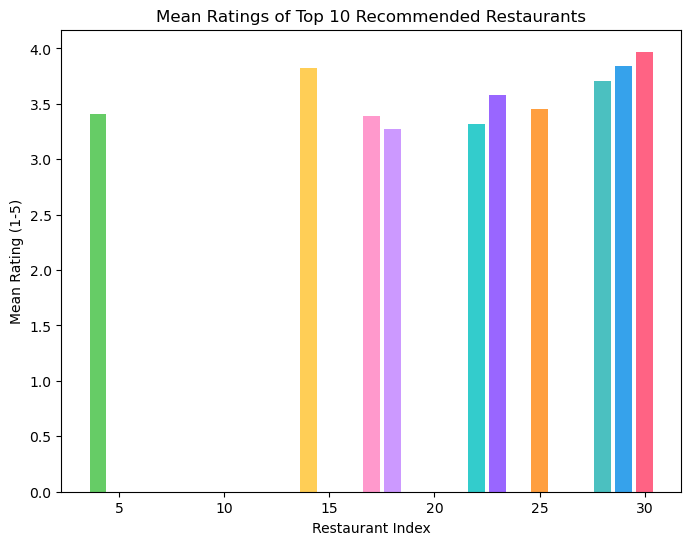

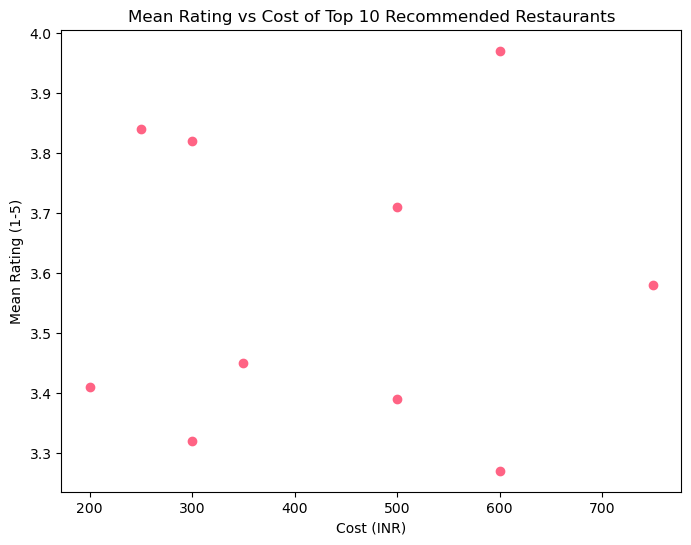

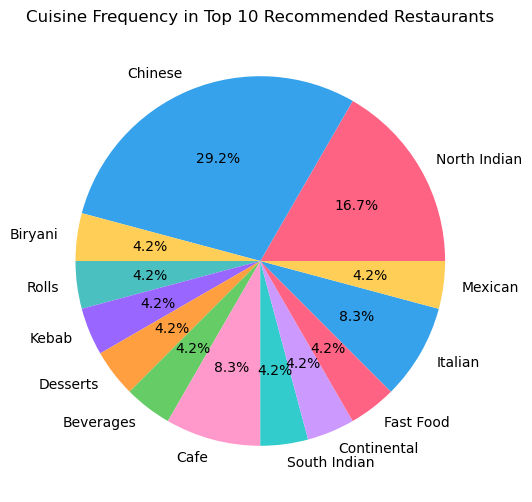

,cuisines,Mean Rating,cost
30,"North Indian, Chinese, Biryani",3.97,600.0
29,"Rolls, Kebab",3.84,250.0
14,"Desserts, Beverages",3.82,300.0
28,"Cafe, Chinese",3.71,500.0
23,Chinese,3.58,750.0
25,"South Indian, Chinese, North Indian",3.45,350.0
4,"Continental, Fast Food, Italian, North Indian",3.41,200.0
17,"North Indian, Chinese",3.39,500.0
22,Chinese,3.32,300.0
18,"Cafe, Italian, Mexican, Chinese",3.27,600.0


In [182]:
recommend('Pai Vihar')

TOP 10 RESTAURANTS LIKE Food Time Now WITH SIMILAR REVIEWS: 


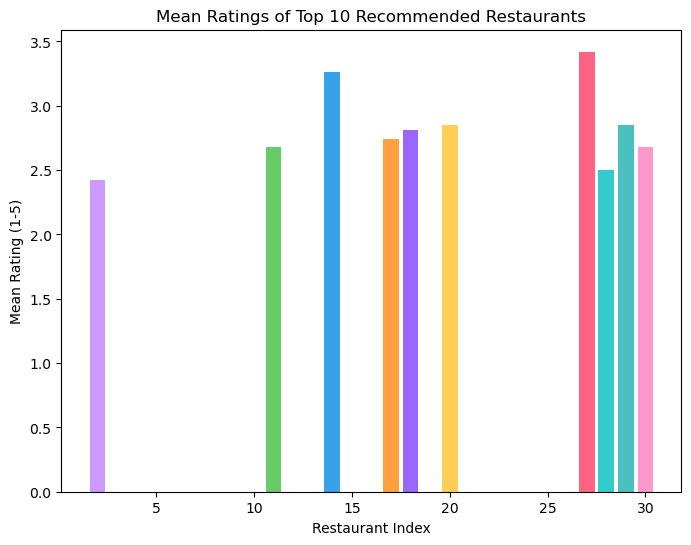

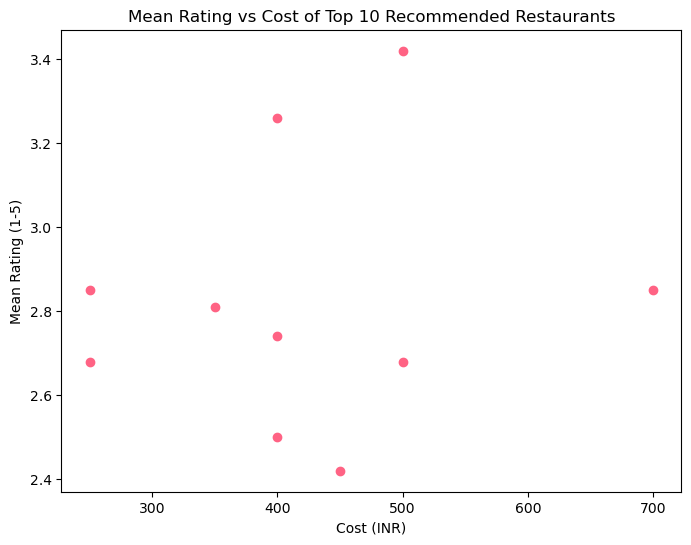

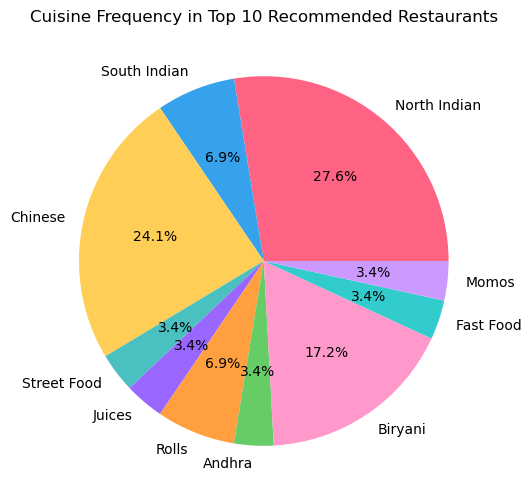

,cuisines,Mean Rating,cost
27,"North Indian, South Indian, Chinese",3.42,500.0
14,"South Indian, North Indian, Chinese, Street Fo...",3.26,400.0
20,"North Indian, Chinese, Rolls",2.85,250.0
29,"Andhra, Biryani",2.85,700.0
18,"North Indian, Chinese, Biryani, Rolls",2.81,350.0
17,"North Indian, Chinese",2.74,400.0
11,"Biryani, Fast Food",2.68,250.0
30,"North Indian, Biryani",2.68,500.0
28,"North Indian, Chinese",2.50,400.0
2,"North Indian, Biryani, Chinese, Momos",2.42,450.0


In [184]:
recommend('Food Time Now')

TOP 3 RESTAURANTS LIKE Cross Road Cafe WITH SIMILAR REVIEWS: 


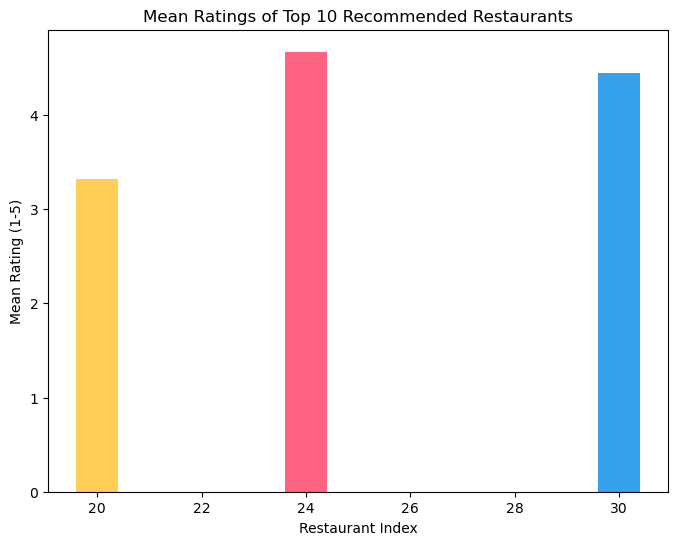

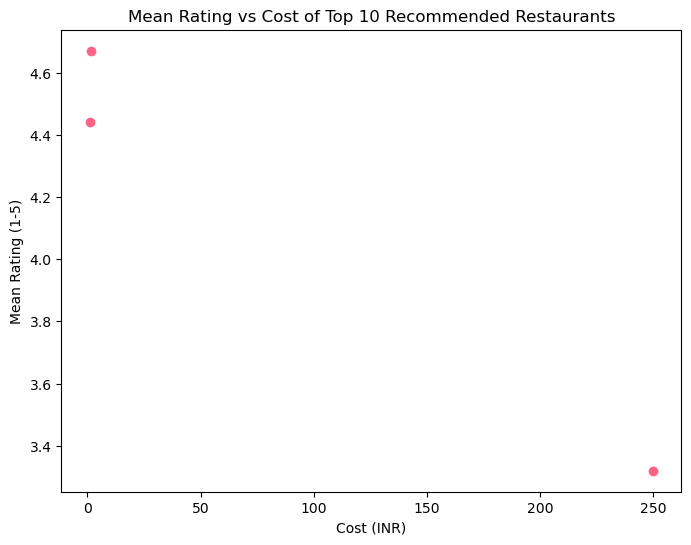

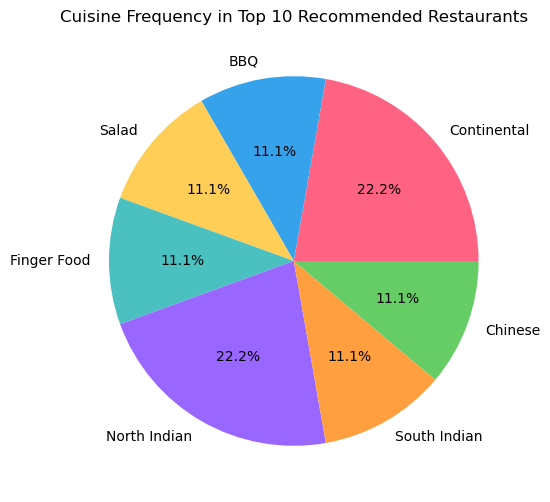

,cuisines,Mean Rating,cost
24,"Continental, BBQ, Salad",4.67,1.5
30,"Finger Food, Continental, North Indian",4.44,1.0
20,"South Indian, North Indian, Chinese",3.32,250.0


In [186]:
recommend('Cross Road Cafe')